# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
number_of_mice = combine_data["Mouse ID"].nunique()
print(f"Numeber of unique mice: {number_of_mice}")

Numeber of unique mice: 249


In [11]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Find duplicate rows based on Mouse ID and Timepoint
duplicate_mice = combine_data[combine_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Get the Mouse IDs that have duplicate entries
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [12]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combine_data[~combine_data["Mouse ID"].isin(duplicate_mouse_ids)]

clean_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [15]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = clean_data["Mouse ID"].nunique()
print(f"Numeber of unique mice: {number_of_mice_clean}")

Numeber of unique mice: 248


## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_regimen = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

# Dictionary to store resutls
summary_statistics = {}
# Calculate mean
summary_statistics["Mean Tumor Volume"] = drug_regimen.mean()
# Calculate median
summary_statistics["Median Tumor Volume"] = drug_regimen.median()
# Calculate variance
summary_statistics["Tumor Volume Variance"] = drug_regimen.var()
# Calculate standard deviation
summary_statistics["Tumor Volume Std. Dev."] = drug_regimen.std()
# Calculate mean
summary_statistics["Tumor Volume Std. Err."] = drug_regimen.apply(lambda x: st.sem(x))

summary_df = pd.DataFrame(summary_statistics)

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_v2 = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    variance="var",
    std_dev="std",
    sem="sem"
)

#Rename columns

drug_regimen_v2 = drug_regimen.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Medaian Tumor Volume",
    "variance": "Tumor Volume Variance",
    "std_dev": "Tumor Volume Std. Dev.",
    "sem":"Tumor Volume Std. Err."
})

drug_regimen_v2

,Mean Tumor Volume,Medaian Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

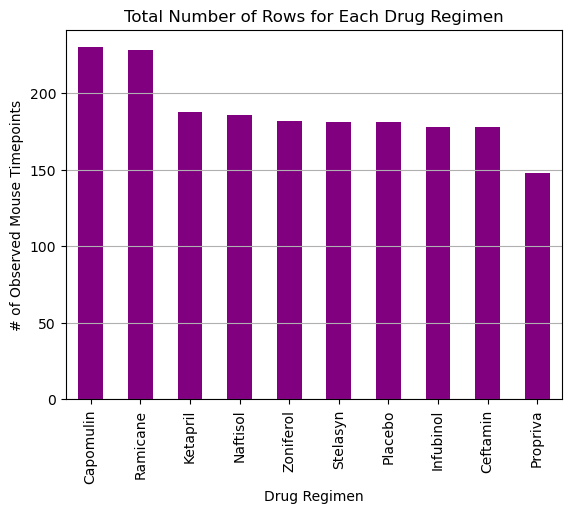

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_counts = clean_data["Drug Regimen"].value_counts()

# Create a bar plot using pandas
ax = drug_regimen_counts.plot(kind="bar", color='purple')

# Add labels and title
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Observed Mouse Timepoints")
ax.set_title("Total Number of Rows for Each Drug Regimen")

# Add grid lines only for the y-axis
ax.yaxis.grid(True)

# Display the plot
plt.show()

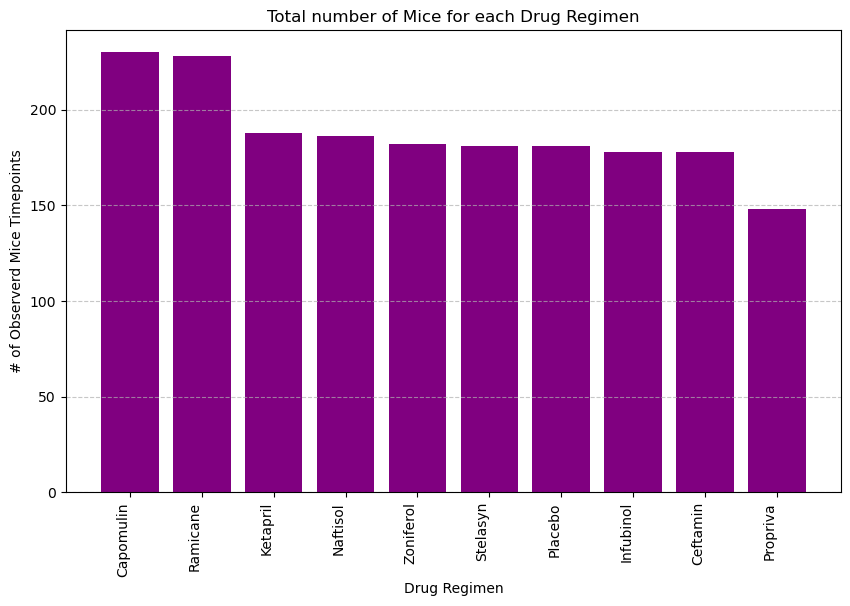

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_data["Drug Regimen"].value_counts()

# Create a bar plot using pyplot 
plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the figure
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='purple')

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observerd Mice Timepoints")
plt.title("Total number of Mice for each Drug Regimen")
plt.xticks(rotation=90, ha='right')

# Add grid lines only for the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

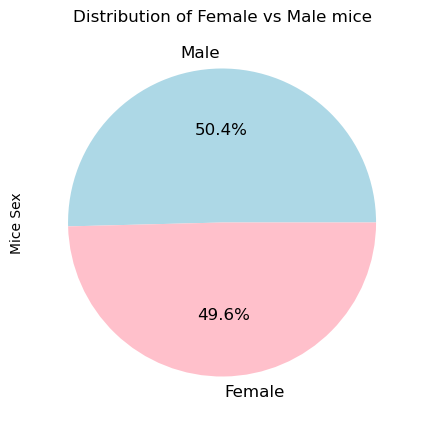

In [79]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_data[["Mouse ID", "Sex"]].drop_duplicates()
gender_counts = unique_mice["Sex"].value_counts()

# Make the pie chart
plt.figure(figsize=(5,5))
gender_pie = gender_counts.plot(kind='pie', y='Sex', autopct='%1.1f%%', colors=['lightblue','pink'],
                   textprops={'color': 'black', 'fontsize': 12}, title="Distribution of Female vs Male mice")
gender_pie.set_ylabel("Mice Sex")
plt.show()

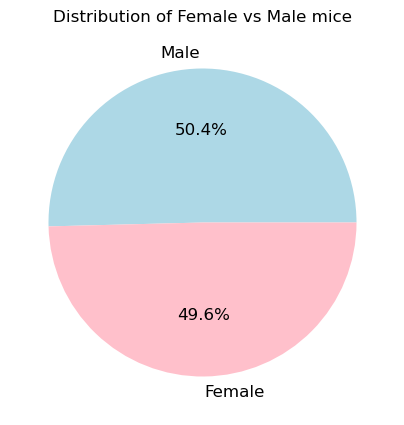

In [77]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_data[["Mouse ID", "Sex"]].drop_duplicates()
gender_counts = unique_mice["Sex"].value_counts()

# Make the pie chart
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue','pink'],
        textprops={'color':'black', 'fontsize': 12})
plt.title("Distribution of Female vs Male mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [83]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_data = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'])
# Filter the data for the specified treatment regimens
filtered_data = last_timepoint_data[last_timepoint_data['Drug Regimen'].isin(regime)]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regime = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q

    # Locate the rows which contain mice on each drug and get the tumor volumes
    outliers = subset[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]

    # add subset
    for drug in regime:
    subset = filtered_data[filtered_data['Drug Regimen'] == drug]
    tumor_vol_data = subset['Tumor Volume (mm3)']
    tumor_vols_data.append(tumor_vol_data)

    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

 outliers = regimen_data[(regimen_data['Tumor Volume (mm3)'] < lower_bound) |
                            (regimen_data['Tumor Volume (mm3)'] > upper_bound)]
    outliers_dict[drug] = outliers[['Mouse ID', 'Tumor Volume (mm3)']]

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


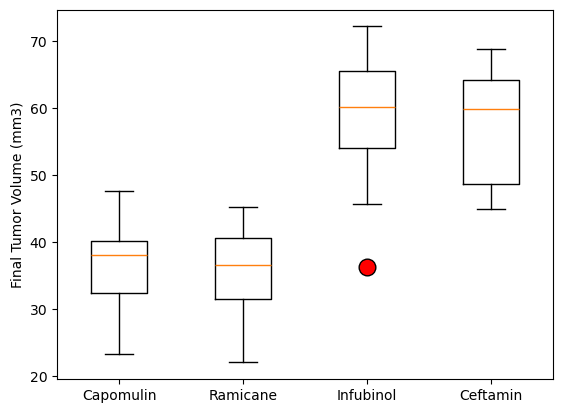

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

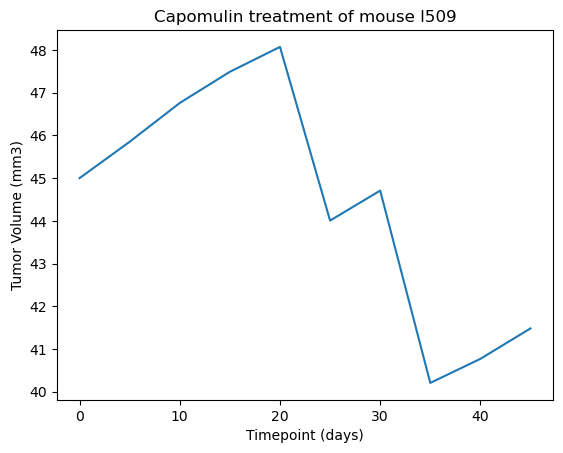

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


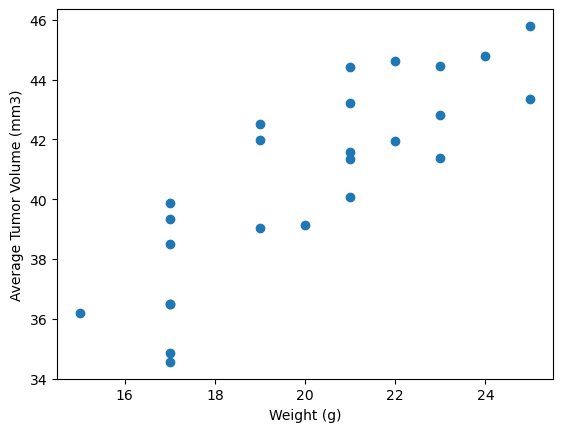

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


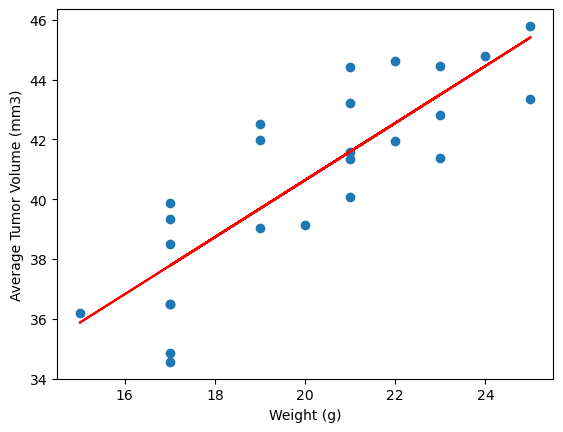

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
